# Kaggle Toxic Comments Challenge

In [1]:
import pandas as pd
import numpy as np
import gensim
import keras
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

C:\Users\Rohith\Anaconda3\envs\tf\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [2]:
%matplotlib inline

## Data Loading

In [3]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,age_category
0,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,18-30
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,30-45
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,18-30
3,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0,30-45
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,30-45


In [5]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
age_category     159571 non-null object
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df.age_category.value_counts()

18-30       86167
30-45       55411
45-60       13152
Under 18     3509
Over 60      1332
Name: age_category, dtype: int64

In [8]:
df.age_category.value_counts()/len(df)*100

18-30       53.999160
30-45       34.724981
45-60        8.242099
Under 18     2.199021
Over 60      0.834738
Name: age_category, dtype: float64

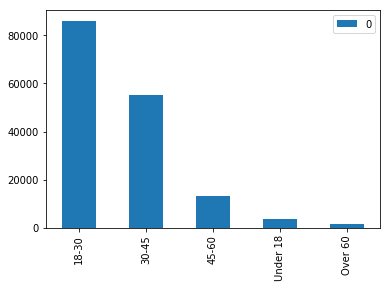

In [9]:
from collections import Counter
age_categories_list = list(df.age_category.values)
age_counts = Counter(age_categories_list)
age_plot_df = pd.DataFrame.from_dict(age_counts, orient='index')
age_plot_df.plot(kind='bar')

In [10]:
df.drop(['age_category'], axis = 1, inplace = True)

## Preprocessing

In [11]:
simple_tokens = df.comment_text.apply(gensim.utils.simple_preprocess)

In [12]:
simple_tokens

0         [explanation, why, the, edits, made, under, my...
1         [aww, he, matches, this, background, colour, s...
2         [hey, man, really, not, trying, to, edit, war,...
3         [more, can, make, any, real, suggestions, on, ...
4         [you, sir, are, my, hero, any, chance, you, re...
5         [congratulations, from, me, as, well, use, the...
6         [cocksucker, before, you, piss, around, on, my...
7         [your, vandalism, to, the, matt, shirvington, ...
8         [sorry, if, the, word, nonsense, was, offensiv...
9         [alignment, on, this, subject, and, which, are...
10        [fair, use, rationale, for, image, wonju, jpg,...
11        [bbq, be, man, and, lets, discuss, it, maybe, ...
12        [hey, what, is, it, talk, what, is, it, an, ex...
13        [before, you, start, throwing, accusations, an...
14        [oh, and, the, girl, above, started, her, argu...
15        [juelz, santanas, age, in, juelz, santana, was...
16        [bye, don, look, come, or, thi

In [13]:
df[df.index==159567]['comment_text']

159567    You should be ashamed of yourself \r\n\r\nThat...
Name: comment_text, dtype: object

In [14]:
phrases = gensim.models.phrases.Phrases(simple_tokens)
tokenizer = gensim.models.phrases.Phraser(phrases)

In [15]:
tokenized_text = list(tokenizer[simple_tokens]) # a 2D list of all the keywords from comment_text

In [16]:
tokenized_text[0]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'were',
 'reverted',
 'they_weren',
 'vandalisms',
 'just',
 'closure',
 'on',
 'some',
 'gas',
 'after',
 'voted',
 'at',
 'new_york',
 'dolls',
 'fac',
 'and',
 'please',
 'don',
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk_page',
 'since',
 'retired',
 'now']

In [17]:
corpus_dict = gensim.corpora.dictionary.Dictionary(tokenized_text)

In [18]:
TARGET_CLASSES = df.columns[1:]

In [19]:
TARGET_CLASSES

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [20]:
targets = df[TARGET_CLASSES].values

## Analysis using seaborn

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

(0, 400)

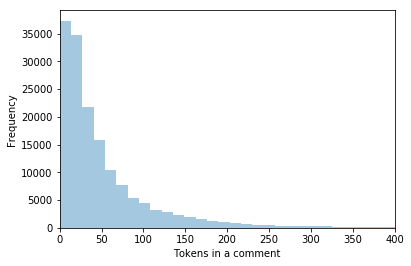

In [22]:
sns.distplot([len(doc) for doc in tokenized_text], bins=100, kde=False, label='Number of tokens per comment.')
plt.xlabel("Tokens in a comment")
plt.ylabel("Frequency")
plt.xlim((0, 400))

## Training word2vec on comment data

In [23]:
word2vec = gensim.models.word2vec.Word2Vec(tokenized_text, window=5, size=100, min_count=2, workers=6)

In [24]:
word2vec.wv.most_similar('popularity')

C:\Users\Rohith\Anaconda3\envs\tf\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('strength', 0.7849506735801697),
 ('leadership', 0.7714779376983643),
 ('vision', 0.7712383270263672),
 ('recognition', 0.771166205406189),
 ('notoriety', 0.770218014717102),
 ('principal', 0.7668126225471497),
 ('membership', 0.7595211267471313),
 ('influence', 0.757525622844696),
 ('discovery', 0.7559966444969177),
 ('his_career', 0.7531882524490356)]

In [25]:
word2vec.wv.most_similar('idiot')

C:\Users\Rohith\Anaconda3\envs\tf\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('asshole', 0.8100345134735107),
 ('loser', 0.8065991401672363),
 ('dude', 0.7971583604812622),
 ('prick', 0.791121780872345),
 ('faggot', 0.7889803051948547),
 ('fuckin', 0.7781703472137451),
 ('cunt', 0.7775804996490479),
 ('fucking', 0.7744321227073669),
 ('bastard', 0.7700861692428589),
 ('retard', 0.7645168304443359)]

## word2vec-based model.

In [26]:
features = np.zeros((len(tokenized_text), word2vec.vector_size))
for i, tokens in enumerate(tokenized_text):
    tokens = [t for t in tokens if t in word2vec.wv.vocab]
    if tokens:
        features[i, :] = np.mean([word2vec.wv[t] / word2vec.wv.vocab[t].count for t in tokens], axis=0)

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(word2vec.vector_size,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(TARGET_CLASSES), activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(features, targets, epochs=10, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/10
143613/143613 [==============================] - 7s 51us/step - loss: 0.0965 - acc: 0.9685 - val_loss: 0.0828 - val_acc: 0.9698
Epoch 2/10
143613/143613 [==============================] - 7s 49us/step - loss: 0.0800 - acc: 0.9711 - val_loss: 0.0801 - val_acc: 0.9705
Epoch 3/10
143613/143613 [==============================] - 7s 46us/step - loss: 0.0787 - acc: 0.9718 - val_loss: 0.0799 - val_acc: 0.9705
Epoch 4/10
143613/143613 [==============================] - 7s 51us/step - loss: 0.0776 - acc: 0.9720 - val_loss: 0.0790 - val_acc: 0.9706
Epoch 5/10
143613/143613 [==============================] - 10s 68us/step - loss: 0.0765 - acc: 0.9724 - val_loss: 0.0776 - val_acc: 0.9712
Epoch 6/10
143613/143613 [==============================] - 7s 50us/step - loss: 0.0759 - acc: 0.9728 - val_loss: 0.0763 - val_acc: 0.9717
Epoch 7/10
143613/143613 [==============================] - 7s 50us/step - loss: 0.0748 - acc: 0.9731 - val_loss: 

In [29]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model-baseline.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    
# serialize model to JSON
model_json = model.to_json()
with open("model-baseline.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model-baseline.h5")
print("Saved model to disk")

Saved model to disk


## Sequential models

In [30]:
# Note: shifting indices by 1 as index 0 will be used for padding.
docs = [[idx + 1 for idx in corpus_dict.doc2idx(doc)]  for doc in tokenized_text]

In [31]:
MAX_SEQ_LEN = 50
padded_docs = keras.preprocessing.sequence.pad_sequences(docs, maxlen=MAX_SEQ_LEN, truncating='post', value=0)

In [32]:
max_idx = max(c for d in docs for c in d)
max_idx

185872

In [33]:
embeddings = np.array([np.random.normal(size=word2vec.vector_size)]+ # for the '0' padding word
                      [word2vec.wv[corpus_dict[idx]]
                      if corpus_dict[idx] in word2vec.wv.vocab
                      else np.random.normal(size=word2vec.vector_size)
                      for idx in range(max_idx)])

### CNN

In [34]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.layers.core import Dense, Dropout
from keras.layers.wrappers import TimeDistributed
from keras.layers import Convolution1D, MaxPool1D, Flatten, BatchNormalization

model = Sequential()
model.add(Embedding(max_idx + 1, word2vec.vector_size, input_length=MAX_SEQ_LEN))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Convolution1D(52, 5, padding='same',
                        kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(MaxPool1D())
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Convolution1D(128, 3, padding='same',
                        kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(MaxPool1D())
model.add(Flatten())
model.add(Dense(len(TARGET_CLASSES), activation='sigmoid',
                kernel_regularizer=keras.regularizers.l2(0.02)))
model.compile(Adam(0.001), 'binary_crossentropy')

In [35]:
model.fit(padded_docs, targets, batch_size=512, epochs=20, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/20
143613/143613 [==============================] - 154s 1ms/step - loss: 0.3911 - val_loss: 0.1212
Epoch 2/20
143613/143613 [==============================] - 182s 1ms/step - loss: 0.0916 - val_loss: 0.0946
Epoch 3/20
143613/143613 [==============================] - 187s 1ms/step - loss: 0.0782 - val_loss: 0.0888
Epoch 4/20
143613/143613 [==============================] - 186s 1ms/step - loss: 0.0706 - val_loss: 0.0887
Epoch 5/20
143613/143613 [==============================] - 186s 1ms/step - loss: 0.0658 - val_loss: 0.0850
Epoch 6/20
143613/143613 [==============================] - 186s 1ms/step - loss: 0.0625 - val_loss: 0.0910
Epoch 7/20
143613/143613 [==============================] - 1326s 9ms/step - loss: 0.0599 - val_loss: 0.0872
Epoch 8/20
143613/143613 [==============================] - 145s 1ms/step - loss: 0.0581 - val_loss: 0.0878
Epoch 9/20
143613/143613 [==============================] - 148s 1ms/step - loss: 0.

In [36]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model-cnn.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    
# serialize model to JSON
model_json = model.to_json()
with open("model-cnn.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model-cnn.h5")
print("Saved model to disk")

Saved model to disk


## Submission

In [37]:
def comment_to_sequential_input(comment):
    tokens = tokenizer[gensim.utils.simple_preprocess(comment)]
    t_ids = [corpus_dict.token2id[t] + 1 for t in tokens if t in word2vec.wv.vocab and t in corpus_dict.token2id]
    return keras.preprocessing.sequence.pad_sequences([t_ids], maxlen=MAX_SEQ_LEN)[0]

In [38]:
test_input = [comment_to_sequential_input("You are a jerk you freakin indian.").reshape(1, -1)]
for target_class, score in zip(TARGET_CLASSES, model.predict(test_input)[0]):
    print("{}: {:.2f}%".format(target_class, score * 100))

toxic: 99.40%
severe_toxic: 6.71%
obscene: 80.70%
threat: 1.55%
insult: 76.78%
identity_hate: 8.84%


In [39]:
test_inputs = np.array([comment_to_sequential_input(doc) for doc in df_test.comment_text])

In [40]:
test_outputs = model.predict(test_inputs)

In [41]:
test_outputs[0]

array([0.99999714, 0.03321979, 0.98999983, 0.00913987, 0.928628  ,
       0.03630313], dtype=float32)

In [42]:
output_df = df_test.reset_index()[['id']].copy()

In [43]:
for i, target_class in enumerate(TARGET_CLASSES):
    output_df[target_class] = test_outputs[:, i]

In [44]:
output_df[output_df.toxic > 0.5].sample(10, random_state=0).merge(df_test.reset_index(), on='id')

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,index,comment_text
0,abeb868a79410461,0.801577,0.009731,0.175360,0.006620,0.222494,0.009965,102988,"* Oh, the creator herself was stupid enough to..."
1,14bad05113468aba,0.707484,0.019307,0.207823,0.009630,0.258109,0.031859,12335,== Dude == \n\n Have you ever had sex?
2,e3515d8da7493752,0.638946,0.011853,0.199274,0.005012,0.155798,0.011648,136023,Penis is good for cend
3,f0a8c4a8253f61ea,0.794940,0.016002,0.359394,0.004645,0.255602,0.013601,144006,kanye west sucks cock
4,ae2602a322deb90a,0.733882,0.019682,0.238398,0.008633,0.276446,0.030002,104334,stuff you monkey nuts
5,9abf88053c9b0af1,0.652923,0.014508,0.198344,0.007858,0.205681,0.018454,92787,You are a very annoying person and apparently ...
6,140a297f5853e660,0.565796,0.013310,0.173478,0.005852,0.176104,0.016549,11948,how do people get fucked
7,ba19606d4db1eba0,0.551273,0.003685,0.060336,0.004220,0.155822,0.007587,111527,""" \n :Never mind, fixed it. It was just a spa..."
8,2662d1682b2b04c6,0.821322,0.010001,0.132449,0.007883,0.327681,0.017729,23000,Just returned to this after leaving a thank-yo...
9,04e46719a597511f,0.673258,0.014658,0.236969,0.005376,0.211732,0.016085,2826,"""Removed """"she was also a whore."""" Kthompson ..."


In [45]:
output_df.to_csv('cnn-pred.csv', index=False)

In [61]:
test_input = [comment_to_sequential_input("You should die, bastard").reshape(1, -1)]
for target_class, score in zip(TARGET_CLASSES, model.predict(test_input)[0]):
    print("{}: {:.2f}%".format(target_class, score * 100))

toxic: 97.68%
severe_toxic: 4.65%
obscene: 68.12%
threat: 1.10%
insult: 65.13%
identity_hate: 6.02%


In [ ]:
test_input = [comment_to_sequential_input("You should die, bastard").reshape(1, -1)]
for target_class, score in zip(TARGET_CLASSES, model.predict(test_input)[0]):
    print("{}: {:.2f}%".format(target_class, score * 100))